# 1. Data Handling

#### a)  load the banana data 

In [150]:
import numpy as np

def loadCSV(filename):
    f = open(filename)
    data = np.loadtxt(f,delimiter=',')
    X = data[:,1:]
    y = data[:,0]
    return X,y

X,y = loadCSV("banana.csv")
N , d = np.shape(X)

#### b) Create numpy array of oredictions acording to rule

In [151]:
import sklearn.metrics 
predictions = np.zeros(N)
for i in range(N):
    predictions[i] = +1 if X[i,1] <=0 else -1
errorrate = sklearn.metrics.zero_one_loss(y,predictions)
print("error rate:" + str(errorrate) + " (" + str(errorrate*100) + " %)" )


error rate:0.4324528301886792 (43.24528301886792 %)


In multilabel classification the zero_one<-loss function corresponds to the subset zero-one loss: for eatch sample entire set of lables must be predicted, otherwise the loss for that sample equal to one.


#### c) Split the data

In [152]:
N_train = N//2
X_train = X[0:N_train,:]
y_train = y[0:N_train]
X_test = X[N_train:N,:]
y_test = y[N_train:N]

plus_train = 0
for i in range(y_train.shape[0]):
    if y_train[i] > 0:
        plus_train +=1

plus_test = 0
for i in range(y_test.shape[0]):
    if y_test[i] > 0:
        plus_test += 1
        
print("number of training points: " + str(X_train.shape[0]))
print("number of +1 lables: " + str(plus_train))
print("number of -1 lables: " + str(X_train.shape[0]-plus_train))
print("number of testing points: " + str(X_test.shape[0]))
print("number of +1 lables: " + str(plus_test))
print("number of -1 lables: " + str(X_test.shape[0]-plus_test))


number of training points: 2650
number of +1 lables: 1153
number of -1 lables: 1497
number of testing points: 2650
number of +1 lables: 1223
number of -1 lables: 1427


# 2. Perceptron 

#### a) Load the Workers data

In [153]:
import numpy as np

X = np.load("workers_x.npy")
y = np.load("workers_y.npy")

np.shape(X)                        # (452, 100, 200, 3)
np.shape(y)                        # (452,)
N = np.shape(X)[0]
d = np.shape(X)[1:]




#### b) Display few images to get Idea about the construction workers 

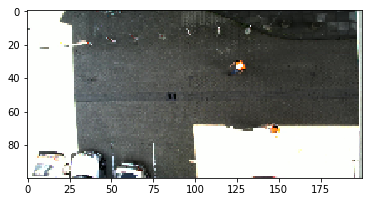

In [154]:
%matplotlib inline
import matplotlib.pyplot as plt

def showimage(x):
    plt.imshow(x)


showimage(X[1,:,:,:])


#### c) Reshape the data to 60000 features for eatch instance

In [201]:
X = X.reshape(-1, 60000)
print(X.shape)
X
X.shape[1]

(452, 60000)


60000

 Numpy allow us to give one of new shape parameter as -1. It simply means that it is an unknown dimension and we want numpy to figure it out. And numpy will figure this by looking at the 'length of the array and remaining dimensions' and making sure it satisfies the above mentioned criteria

#### d) Implement the perceptron algorithm 

In [202]:
import sys
def train_perceptron(X, y):
    N = X.shape[0]
    d = X.shape[1]
    w = np.zeros(d)
    w0 = 0.0
    iter = 0
    sys.stdout.write("training on " + str(N) + " points ")
    while True:
        # progress output
        iter += 1
        if iter % 100 == 0:
            sys.stdout.write(".")
            sys.stdout.flush()
        # find a wrongly classified point
        found = False
        for i in range(N):
            if y[i] * (w0 + np.dot(w, X[i])) <= 0:
                found = True
                break
        # stop if there is no such point
        if not found:
            break
        # update the weight vector
        w0 += y[i]
        w += y[i] * X[i]
        #print(w0)
        #print(w)
    print("finished in " + str(iter) + " iterations")
    return w0, w

#### e) Testing the Perceptron Algorithem with a dummy 

In [203]:
X_dummy = np.array([[0.99, -1], [1.01, -1], [0.99, 1], [1.01, 1]])
y_dummy = np.array([-1,+1,-1,+1])

w0, w = train_perceptron(X_dummy, y_dummy)
print("w0: " + str(w0))
print("w: " + str(w))

training on 4 points ....finished in 401 iterations
w0: -2.0
w: [2. 0.]


#### f.1) Splitting the data to Training and test data. 

In [204]:
N_split = N//2
X_train = X[0:N_split,:]
y_train = y[0:N_split]
X_test = X[N_split:N,:]
y_test = y[N_split:N]


#### f.2) Train on the first half of the data

In [205]:
w0_train, w_train = train_perceptron(X_train, y_train)

training on 226 points ....finished in 495 iterations


#### f.3) Make Prediction on 2nd half and count the wrongly predicted lables


In [206]:
def prediction(X,w0,w):
    y=np.sign(np.dot(w,X)+w0)
    return y


In [221]:
y_guess = np.zeros(N_split)
for i in range(N_split):
    y_guess[i] = prediction(X_test[i],w0_train,w_train)
    
correctGuesspoints = np.sum(y_test==y_guess)
wrongGuespoints = N_split-correctGuesspoints
errorRate = wrongGuespoints/N_split

sys.stdout.write("Wrong guess points = " + str(wrongGuespoints))
sys.stdout.write("\nError Rate is = " + str(errorRate))

Wrong guess points = 3
Error Rate is = 0.01327433628318584